# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студентка гр. 0381 Короткина Елизавета. Вариант №8

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними
$$D_{ij}=(X_{ij}, X_{ji}), i \neq j$$

Виды диад:
- **Взаимная диада**: $D_{ij}=(1, 1)$
- **Асимметричная диада**: $D_{ij}=(1, 0), D_{ij}=(0, 1)$
- **Нулевая диада**: $D_{ij}=(0, 0)$

**Цензус диад** - тройка чисел <M, A, N>, где:

- $M=\sum_{i<g}X_{ij}X_{ji}$ - количество взаимных диад

- $A=X_{++}-2M$ - количество асимметричных диад

- $N=\binom{g}{2} - A - M$ - количество нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе:
$$-\inf<p_{KP}\leq1$$
Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

**Фиксированный выбор**:
- Предполагается, что каждый актор делает d выборов из (g-1) акторов, доступных для выбора
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)M-gd^{2}}{gd(g-1-d)}$$

**Свободный выбор**:
- i-й актор выбирает $d_O(n_i)=x_{i+}$ акторов
- Пусть $L=\sum x_{i+}, L_2=\sum x_{i+}^2$
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}$$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [11]:
#подключение библиотек
library(network)
library(igraph)
library(sna)
library(HyperG)

1. Смоделирован случайный орграф $\mathscr{G}_{d}$ на основе модели Эрдеша—Реньи: $\mathscr{G}_{d}=\mathscr{G}(g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.

Вариант 8: g=63, p=0.65

In [20]:
g <- 63
p <- 0.65
G <- sample_gnp(g, p, directed=TRUE)

Модель Эрдёша — Реньи — это модель генерации случайных графов, в которой граф строится путем добавления очередного ребра с вероятностью p. Все ребра добавляются независимо друг от друга. В данной модели все графы с n узлами и M ребрами имеют одинаковую вероятность $p^{M}(1-p)^{\binom{1}{2}-M}$

2. Полученный граф отображен.

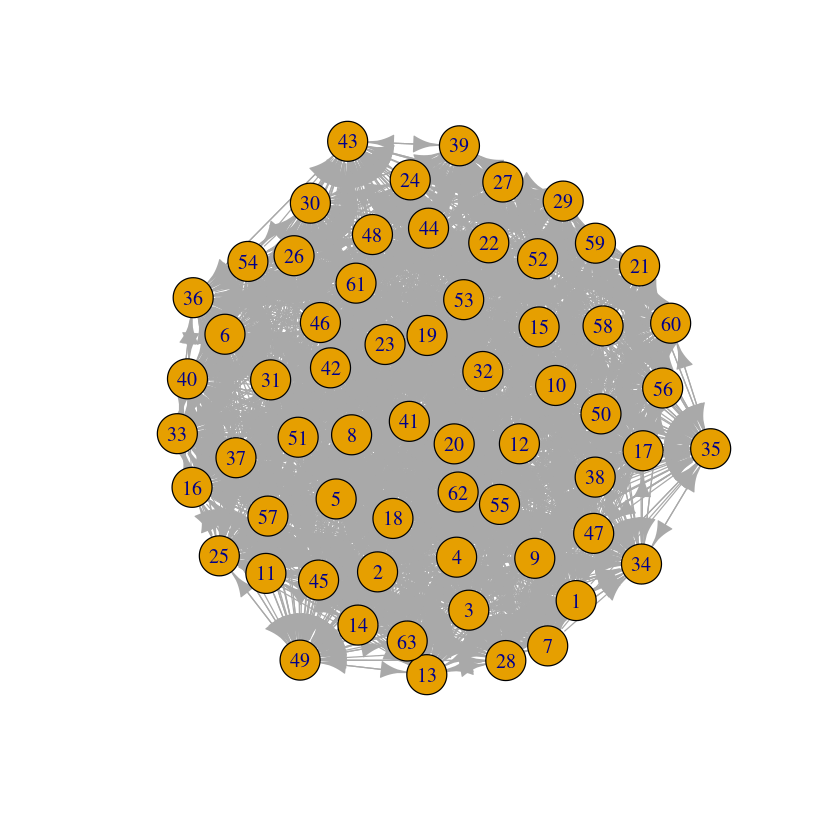

In [21]:
l <- layout.fruchterman.reingold(G)
plot(G, layout=l)

3. Вычислена пятичисловая сводка для графа.

In [22]:
net <- as.network(as.matrix(G, "edgelist"), directed=TRUE)

print(paste('Размер сети:', network.size(net)))
print(paste('Плотность сети:', gden(net, mode="graph")))
print(paste('Компоненты сети:', components(net)))

geoDistances <- geodist(net) #геодезистские расстояния
print(paste('Диаметр: ', max(geoDistances$gdist)))

print(paste('Коэффициент кластеризации: ', gtrans(net, mode = "graph")))

[1] "Размер сети: 63"
[1] "Плотность сети: 0.650281618023554"
[1] "Компоненты сети: 1"
[1] "Диаметр:  2"
[1] "Коэффициент кластеризации:  0.648797659774902"


4. Вычислен цензус диад.

In [23]:
census <- dyad_census(G)
print(paste('M:', census$mut))
print(paste('A:', census$asym))
print(paste('N:', census$null))

[1] "M: 828"
[1] "A: 884"
[1] "N: 241"


Из цензуса диад можно сделать вывод, что в графе относительно мало пар акторов, между которыми отсутствует связь, в то время как большинство пар меют между собой как минимум одностороннюю связь.

5. Вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [66]:
katzPowellFixed <- function(d, Gr, g) {
    M <- dyad_census(Gr)$mut
    result <- (2*(g-1)*M - g*d*d)/(g*d*(g-1-d))
    return (result)
}

katzPowellFree <- function(G, g) {
    M <- dyad_census(G)$mut
    L <- sum(igraph::degree(G, mode="in"))
    L_2 <- sum(igraph::degree(G, mode="in")^2)
    result <- (2*(g-1)^2*M-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
    return (result)
}
rho_fixed <- katzPowellFixed(32, G, 63)
print(rho_fixed)
rho_free <- katzPowellFree(G, 63)
print(rho_free)

[1] 0.6309524
[1] 0.00513346


Индекс взаимности Каца-Пауэла показывает склонность к взаимным связям в сети, чем ближе он к 1, тем выше склонность. Из результатов можно видеть, что при свободном выборе склонность к взаимным связям довольно мала (0.005), но при фиксированном выборе может значительно отличаться, например, при выборе 32 акторов склонность гораздо больше (0.63), т.е. взаимных связей будет меньше.

6. Вычислены вероятности того, что связь будет взаимной для каждого случая. Вычисление для фиксированного выбора произведено по формуле:
$$P(i \to j \text{ and } j \to i) = \frac{d}{g-1}(\frac{d}{g-1} + \rho_{KP}\frac{g-1-d}{g-1})$$
Вычисление для свободного выбора произведено по формуле:
$$P(i \to j \text{ and } j \to i) = \frac{x_{i+}x_{j+}}{(g-1)^2}$$

In [17]:
#вероятность для фиксированного числа
p_fixed <- function(d, g, rho) {
    return (d/(g-1)*(d/(g-1)+rho*(g-1-d)/(g-1)));
}

p_fixed(5, 63, rho_fixed)

#вероятность для свободного выбора
p_free<-function(g, xi, xj) {
    return (xi*xj/(g-1)^2)
}
in_deg <- igraph::degree(G, mode="in")
for (j in length(in_deg):1){
    for (i in length(in_deg):1) {
        if (i != j) {
            print(paste("i: ", i, "j: ", j,  p_free(63, in_deg[i], in_deg[j])))
        }
    }
}

[1] 0.4393241

[1] "i:  62 j:  63 0.426638917793965"
[1] "i:  61 j:  63 0.395421436004162"
[1] "i:  60 j:  63 0.385015608740895"
[1] "i:  59 j:  63 0.426638917793965"
[1] "i:  58 j:  63 0.4474505723205"
[1] "i:  57 j:  63 0.437044745057232"
[1] "i:  56 j:  63 0.468262226847034"
[1] "i:  55 j:  63 0.426638917793965"
[1] "i:  54 j:  63 0.416233090530697"
[1] "i:  53 j:  63 0.426638917793965"
[1] "i:  52 j:  63 0.437044745057232"
[1] "i:  51 j:  63 0.416233090530697"
[1] "i:  50 j:  63 0.489073881373569"
[1] "i:  49 j:  63 0.4474505723205"
[1] "i:  48 j:  63 0.385015608740895"
[1] "i:  47 j:  63 0.40582726326743"
[1] "i:  46 j:  63 0.395421436004162"
[1] "i:  45 j:  63 0.385015608740895"
[1] "i:  44 j:  63 0.4474505723205"
[1] "i:  43 j:  63 0.416233090530697"
[1] "i:  42 j:  63 0.426638917793965"
[1] "i:  41 j:  63 0.426638917793965"
[1] "i:  40 j:  63 0.426638917793965"
[1] "i:  39 j:  63 0.395421436004162"
[1] "i:  38 j:  63 0.499479708636837"
[1] "i:  37 j:  63 0.426638917793965"
[1] "i:  36 j:  63 

7. Вычислен индекс взаимности Бандиопадхьяйя.

In [48]:
combination <- function(n, k) {
    return (factorial(n)/(factorial(k)*factorial(n-k)))
}

f <- function(G, t) {
    g <- 63
    sums <- sum(igraph::degree(G, mode="in")) - t * (g-1) - combination(t, 2)
    return (sums)
}

g <- function(G, t) {
    indegs <- igraph::degree(G, mode="in")
    sums_deg <- 0
    for (i in (t+1):63){
        sums_deg <- sums_deg + min(t, indegs[i])
    }
    sums_all_deg <- sum(igraph::degree(G, mode="in"))
    return (sums_all_deg - t(t-1) - sums_deg)
}

f_vals <- c()
g_vals <- c()
for (i in 2:(63-2)){
    f_vals <- append(f_vals, f(G, i))
    g_vals <- append(g_vals, g(G, i))
}
M_min <- max(f_vals)
M_max <- 0.5*(sum(igraph::degree(G, mode="in")) - max(g_vals))
rho_b <- (census$mut - M_min)/(M_max - M_min)
print(rho_b)

[1] 0.6743149


Индекс взаимности Бандиопадхьяйя примерно соответствует параметру p при генерации графа и указывает на то, что взаимные связи в графе встречаются часто.

8. Проверена нулевая гипотеза о том, что число дуг L в орграфе $ \mathscr{G}_d$ имеет биномиальное распределение $L \sim Bin(g(g − 1), 1/2)$ при уровне значимости $\alpha$.

In [10]:
g <- 63
p_bin <- 0.5
e <- length(E(G))
alpha <- 0.03 #уровень значимости
binom.test(e, g*(g-1), p_bin,
           conf.level = 1 - alpha)


	Exact binomial test

data:  e and g * (g - 1)
number of successes = 2571, number of trials = 3906, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
97 percent confidence interval:
 0.6414847 0.6746674
sample estimates:
probability of success 
             0.6582181 


Гипотеза отвергается: уровень значимости 0.03 превышает значение p-value. Поскольку гипотеза была отвергнута, максимальный уровень значимости не определяется.

9. Проверена нулевая гипотеза о том, что число дуг L в орграфе $ \mathscr{G}_d$ имеет биномиальное распределение $L \sim Bin(g(g − 1), P_0)$ при уровне значимости $\alpha$.

In [108]:
g <- 63
p_bin <- 0.53
e <- length(E(G))
alpha <- 0.03 #уровень значимости
binom.test(e, g*(g-1), p_bin,
           conf.level = 1 - alpha)


	Exact binomial test

data:  e and g * (g - 1)
number of successes = 2551, number of trials = 3906, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.53
97 percent confidence interval:
 0.6363107 0.6696099
sample estimates:
probability of success 
             0.6530978 


Гипотеза отвергается: уровень значимости 0.03 превышает значение p-value. Поскольку гипотеза была отвергнута, максимальный уровень значимости не определяется.

10. Построен доверительный интервал для оценки параметра p с надежностью $1-\alpha$.

In [65]:
g<-63
avg_edg <- gsize(G)/(g*(g-1))
q <- qnorm(1 - (alpha/2), 0, 1)
left <- avg_edg - q * sqrt((avg_edg * (1 - avg_edg ))/(g * (g - 1)))
right <- avg_edg + q * sqrt((avg_edg  * (1 - avg_edg ))/(g * (g - 1)))
print(paste("(", left, ",", right, ")"))

[1] "( 0.633723092157566 , 0.666840143889541 )"


С вероятснотью 0.97 параметр находится в найденном интервале.

## Выводы

Были получены навыки работы с математическими пакетами для статистического анализа социальных сетей. Был изучен алгоритм генерации случайного графа на основе модели Эрдеша—Реньи, сгенерирован сам граф и проведен его анализ. В ходе анализа определено, что при заданных параметрах генерации (p=0.65, g=63) большинство акторов имеют как минимум одностороннюю связь. Для графа были вычислены оценки индексов взаимности Каца—Пауэла и Бандиопадхьяйя, которые примерно совпали с заданным значение вероятности появления ребра в графе p, чего и следовало ожидать. Были проверены нулевые гипотезы о биноминальном распределении числа дуг в графе, и обе гипотезы оказались отвергнуты. 